### Mind your Ps and Qs

#### Description

Decrypt my super sick RSA:

c: 62324783949134119159408816513334912534343517300880137691662780895409992760262021

n: 1280678415822214057864524798453297819181910621573945477544758171055968245116423923

e: 65537

#### Solution

I use an external library (factordb) and (gmpy2).

In [ ]:
!pip install factordb-pycli
!pip install gmpy2

In [21]:
from factordb.factordb import FactorDB  # For connecting to FactorDB and factorizing integers
import gmpy2  # For mathematical operations with arbitrary precision

# Given values
c = 62324783949134119159408816513334912534343517300880137691662780895409992760262021
n = 1280678415822214057864524798453297819181910621573945477544758171055968245116423923
e = 65537

# Connect to FactorDB and factorize n to retrieve prime factors p and q
f = FactorDB(n)
f.connect()
p, q = f.get_factor_list()

# Compute Euler's totient function φ(n)
ph = (p - 1) * (q - 1)

# Calculate the private exponent d using modular multiplicative inverse
d = gmpy2.invert(e, ph)

# Decrypt the ciphertext c using the private exponent d and modulus n
plaintext = pow(c, d, n)

# Convert the plaintext from hex to string and print it as the flag
print("{}".format(bytearray.fromhex(format(plaintext, 'x')).decode()))

picoCTF{sma11_N_n0_g0od_05012767}


### The numbers

#### Description

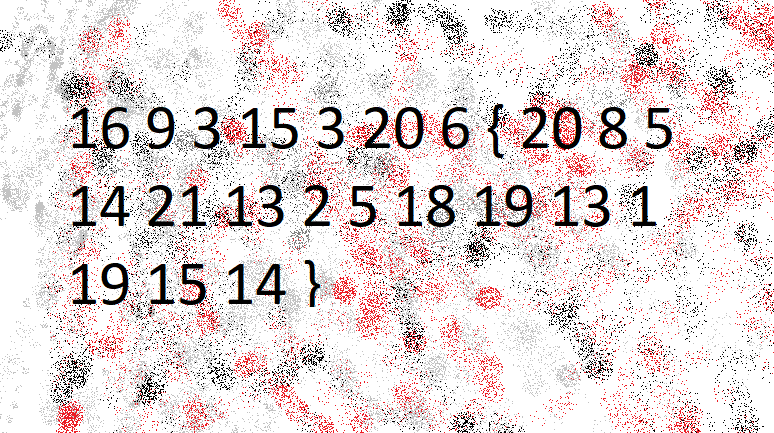

#### Solution

The encription is the position of each letter in the alphabet

PicoCTF{FLAG}

In [24]:
def numbers_to_alphabet_positions(numbers):

    alphabet_positions = []
    for number in numbers:
        if 1 <= number <= 26:
            # Convert the number to its corresponding letter in uppercase
            alphabet_position = chr(ord('A') + number - 1)
            alphabet_positions.append(alphabet_position)
        elif number == 32:
            # Handle space character
            alphabet_positions.append(' ') 
        else:
            return None  # If number is not within valid range, return None

    return ''.join(alphabet_positions)  # Join the list of alphabet positions into a string

numbers = [16, 9, 3, 15, 3, 20, 6, 20, 8, 5, 14, 21, 13, 2, 5, 18, 19, 13, 1, 19, 15, 14]

result = numbers_to_alphabet_positions(numbers) 

print(result) 

### Anser: PICOCTF{THENUMBERSMASON}


PICOCTFTHENUMBERSMASON


### No Padding, No Problem

We have to connect to the attached server: nc mercury.picoctf.net 42248.

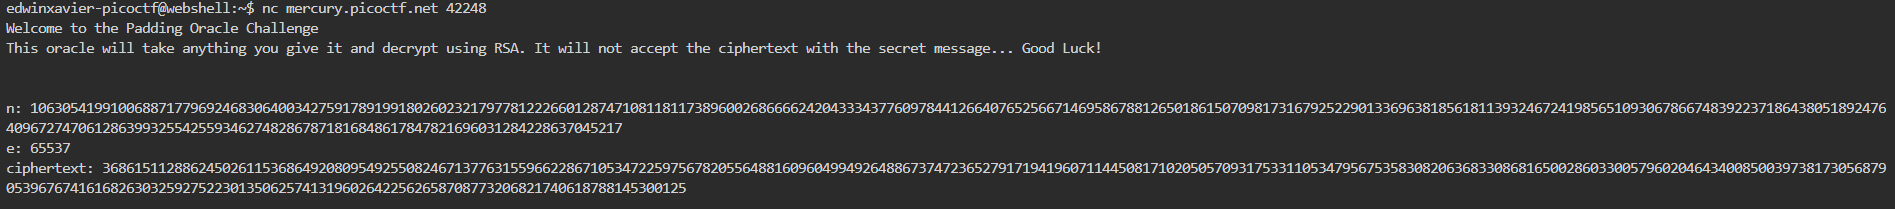

In [39]:
import binascii

n = 106305419910068871779692468306400342759178919918026023217977812226601287471081181173896002686666242043334377609784412664076525667146958678812650186150709817316792522901336963818561811393246724198565109306786674839223718643805189247640967274706128639932554255934627482867871816848617847821696031284228637045217
e = 65537
ciphertext = 36861511288624502611536864920809549255082467137763155966228671053472259756782055648816096049949264886737472365279171941960711445081710205057093175331105347956753583082063683308681650028603300579602046434008500397381730568790539676741616826303259275223013506257413196026422562658708773206821740618788145300125

enc =  pow(2, e, n)*ciphertext
print(enc)


1075924503688109514477921315168209984789208488756815723635741233395369824103381832792810827323452027712734505126104372459506503420756252089021856523078070439997129672622483106378893995829557977288835784048323457129267031902522115116250546104806468218921447841829642528131585065976852223857649176975143299764720446227497284269022501069394902331538590774037558200927713870213053188954518277540042138346625045203919737997120920926113856189189598530658164849842851328321738888606933461675929318143196406766429428435964023663019908985599042003471550445837028139502196989073088370123679692575395698515386575435825106302500


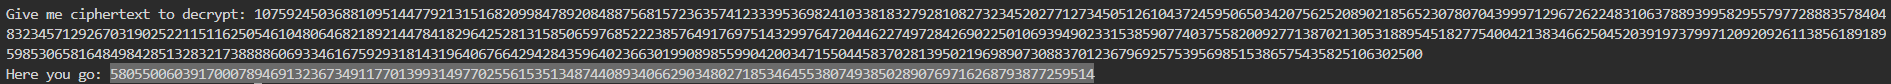

In [40]:
decrypted = 580550060391700078946913236734911770139931497702556153513487440893406629034802718534645538074938502890769716268793877259514

flag = "{:x}".format(decrypted//2)

print(binascii.unhexlify(flag))


b'picoCTF{m4yb3_Th0se_m3s54g3s_4r3_difurrent_7416022}'


### Easy 1

#### Description

Table: 

```
    A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
   +----------------------------------------------------
A | A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
B | B C D E F G H I J K L M N O P Q R S T U V W X Y Z A
C | C D E F G H I J K L M N O P Q R S T U V W X Y Z A B
D | D E F G H I J K L M N O P Q R S T U V W X Y Z A B C
E | E F G H I J K L M N O P Q R S T U V W X Y Z A B C D
F | F G H I J K L M N O P Q R S T U V W X Y Z A B C D E
G | G H I J K L M N O P Q R S T U V W X Y Z A B C D E F
H | H I J K L M N O P Q R S T U V W X Y Z A B C D E F G
I | I J K L M N O P Q R S T U V W X Y Z A B C D E F G H
J | J K L M N O P Q R S T U V W X Y Z A B C D E F G H I
K | K L M N O P Q R S T U V W X Y Z A B C D E F G H I J
L | L M N O P Q R S T U V W X Y Z A B C D E F G H I J K
M | M N O P Q R S T U V W X Y Z A B C D E F G H I J K L
N | N O P Q R S T U V W X Y Z A B C D E F G H I J K L M
O | O P Q R S T U V W X Y Z A B C D E F G H I J K L M N
P | P Q R S T U V W X Y Z A B C D E F G H I J K L M N O
Q | Q R S T U V W X Y Z A B C D E F G H I J K L M N O P
R | R S T U V W X Y Z A B C D E F G H I J K L M N O P Q
S | S T U V W X Y Z A B C D E F G H I J K L M N O P Q R
T | T U V W X Y Z A B C D E F G H I J K L M N O P Q R S
U | U V W X Y Z A B C D E F G H I J K L M N O P Q R S T
V | V W X Y Z A B C D E F G H I J K L M N O P Q R S T U
W | W X Y Z A B C D E F G H I J K L M N O P Q R S T U V
X | X Y Z A B C D E F G H I J K L M N O P Q R S T U V W
Y | Y Z A B C D E F G H I J K L M N O P Q R S T U V W X
Z | Z A B C D E F G H I J K L M N O P Q R S T U V W X Y
```

encrypted flag: UFJKXQZQUNB 

Key: SOLVECRYPTO

#### Solution

This case is a classic Vigenere cipher. So we can solve it using any online decoder In this case I'm using Cyberchef.

Wher the answer given is: CRYPTOISFUN

Or we can decode manually wehere:

For each letter in the key:

    Find the row corresponding the the letter
    In the row, find the column which contains the matching ciphertext letter
    The matching plaintext letter is noted at the top of the column

In this, the plaintext is CRYPTOISFUN.


### Pixelated

#### Description

I have these 2 images, can you make a flag out of them? 

scrambled1.png 

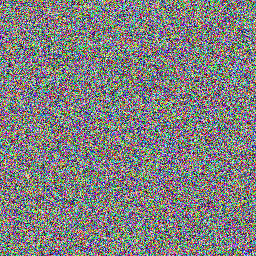

scrambled2.png

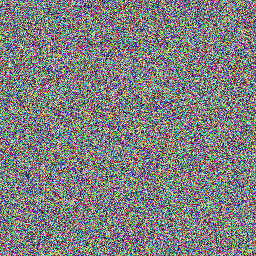

#### Solution

having the two images, I can combine them to produce a flag.

In [17]:
from PIL import Image  # For working with images
import numpy as np  # For array manipulation
import os  # For interacting with the operating system

# List of file names of images to be processed
file_names = ["scrambled1.png", "scrambled2.png"]

# Read the images and convert them to numpy arrays
img_data = [np.asarray(Image.open(f'{name}')) for name in file_names]

# Copy the data from the first image and add it with the data from the second image
data = img_data[0].copy() + img_data[1].copy()

# Create a new image from the combined data and save it to a file
new_image = Image.fromarray(data)
new_image.save("out.png", "PNG")


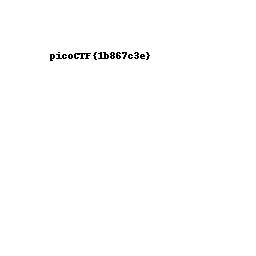

The result image contained the flag: picoCTF{1b867c3e}